Here we'll solve for the motion of a rocket.

The shell of the rocket has a mass $m_r$ and it contains fluid with mass $m_f$.

The mass of the fluid in the rocket as a function of time follows the functional form:

$$ m_f = m_{0,f} - \dot{m}_{0,f} t + \frac{k_1}{2} t^2 $$

The mass flow rate of fuel from the rocket due to combustion, $\dot{m}_f$, is

$$ \dot{m}_f = -\frac{d m_f}{dt} = \dot{m}_{0,f} - k_1 t$$



The velocity of the rocket exhaust, $v_e$, follows the form

$$ v_e = v_0 - k_2 t $$

We want to find the velocity and altitude of the rocket in the instant when the fuel is exhausted given the following constants:

| Constant        | Value                  |
|-----------------|------------------------|
| $m_{0,f}$ | $5~kg$     |
| $m_r$           | $1~kg$                 |
| $\dot{m}_{0,f}$ | $10~\frac{kg}{s}$     |
| $k_1$           | $5.7~\frac{kg}{s^2}$ |
| $v_0$           | $40~\frac{m}{s}$       |
| $k_2$           | $4.3~\frac{m}{s^2}$   |

From a momentum balance, we know that

$$\sum F = \dot{m_f}v_e - m g = m a = m \frac{d v}{d t} = m \frac{d^2 x}{d t^2}$$

where $a$, $v$, and $x$ are the instantaneous acceleration, velocity, and position of the rocket and $m$ is the total mass of the rocket ($m_r + m_f$).

Note that $\dot{m_f}$, $v_e$, and $m$ are functions of time; to solve this numerically, we will use standard ordinary differential equation methods. Most commonly, these methods take some set of equations $\frac{d\mathbf{f}}{dt}$ and initial values $\mathbf{f}_0$ and integrate them forward over time.

First, we input our constants and equations governing the system:


In [1]:
m_0f = 5
m_r = 1
mdot_0f = 10
k1 = 5.7
v0 = 40
k2 = 4.3
g = 9.81

mdot_f = lambda t: mdot_0f - k1*t
v_e = lambda t: v0 - k2*t
m = lambda t: m_r + mdot_f(t)

sumOfForces = lambda t: mdot_f(t)*v_e(t) - m(t)*g

To put these into a form usable by ODE solvers, we will let our vector of values 

$$\mathbf{f}=\left[\frac{dx}{dt}, x\right]$$; 

then our derivative vector 

$$\frac{df}{dt}=\left[\frac{d^2 x}{dt^2}, \frac{dx}{dt}\right]$$.

To pass these into an equation for the integration method we use, we supply $\frac{df}{dt}(f, t)$. Note that in matlab, the ode45 function takes $\frac{df}{dt}(t, f)$.

In [2]:
dfdt = lambda f, t: [sumOfForces(t)/m(t), # dv/dt = sumOfForces/m
                    f[0]]                 # dx/dt = v = f[0]

f0 = [0, 0] # initial velocity is 0 and initial position is 0

We should also find the time it takes for the tank to be emptied by solving the second-order polynomial for when $m_f=0$

In [3]:
from math import sqrt
tmax = (mdot_0f - sqrt(mdot_0f**2 - 4*k1/2*m_0f))/2/k1*2
print('tmax = {}'.format(tmax))

tmax = 0.603958153631228


Now we can integrate this using `odeint` to get $\mathbf{f}(t)$ as follows:

In [4]:
import scipy as sp, scipy.integrate

t = sp.linspace(0, tmax, 1024) # 1024 time values linearly spaced from t=0 to t=20 s
f = sp.integrate.odeint(dfdt, f0, t)

print('Final v: {} m/s'.format(f[-1, 0]))
print('Final x: {} m'.format(f[-1, 1]))

Final v: 14.905972849135207 m/s
Final x: 4.619581521862367 m


Finally, we can plot the time evolution of $v$ and $x$ as follows:

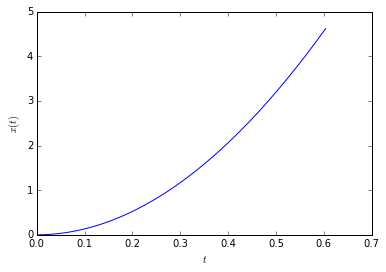

In [5]:
%matplotlib inline
import matplotlib, matplotlib.pyplot as pp

pp.plot(t, f[:, 1])
pp.xlabel('$t$'); pp.ylabel('$x(t)$')

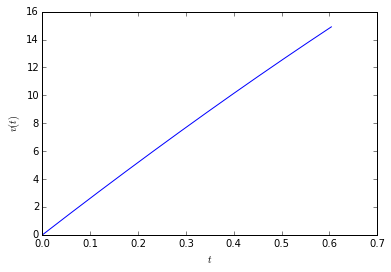

In [6]:
%matplotlib inline
import matplotlib, matplotlib.pyplot as pp

pp.plot(t, f[:, 0])
pp.xlabel('$t$'); pp.ylabel('$v(t)$')